In [7]:
cfg = {
    "battery": {
        "capacity": 5000,
        "chargelimit": 3000/60,
        "discargelimit": 3000/60,
        
    },
    "pv": [
        { "latitude":52.51890653973749, 
          "longitude":13.375925533235622, 
          "surface_tilt":30,
          "surface_azimuth":-90, 
          "loss":10,
          "pvcalculation":True, 
          "peakpower":9.8
        },
        {
            "latitude":52.51890653973749, 
            "longitude":13.375925533235622, 
            "surface_tilt":30, 
            "surface_azimuth":90, 
            "loss":10,
            "pvcalculation":True, 
            "peakpower":9.8
        }
    ]
}


%run PV-Toolbox.ipynb

last = loadSvensLastProfil('lastprofile_eintag.csv')
pvErtrag = getPVGISData(cfg, 2015)

simulation = simulate(pvErtrag, last, cfg)

In [8]:
summary = stats(simulation,cfg)
tabulate.tabulate([summary], tablefmt='html', headers="keys")

verbrauch,pv,netzbezug,netzeinspeisung,batterieladung,batterieendladung,kapazität,vollzyklen
5133,17153,1182,13201,1562,1560,5000,312


In [9]:
summary = statsMon(simulation,cfg)
tabulate.tabulate(summary, tablefmt='html', headers="keys")

verbrauch,pv,netzbezug,netzeinspeisung,batterieladung,batterieendladung,kapazität,vollzyklen,monat
436,262,247,72,119,117,5000,23,1
394,729,125,460,149,149,5000,30,2
436,1248,76,887,170,169,5000,34,3
422,2024,32,1632,124,123,5000,25,4
436,2423,24,2012,104,104,5000,21,5
422,2464,31,2073,100,100,5000,20,6
436,2506,25,2096,100,100,5000,20,7
436,2453,27,2045,114,114,5000,23,8
422,1521,47,1147,145,147,5000,29,9
436,876,118,558,167,168,5000,34,10


<Axes: xlabel='monat'>

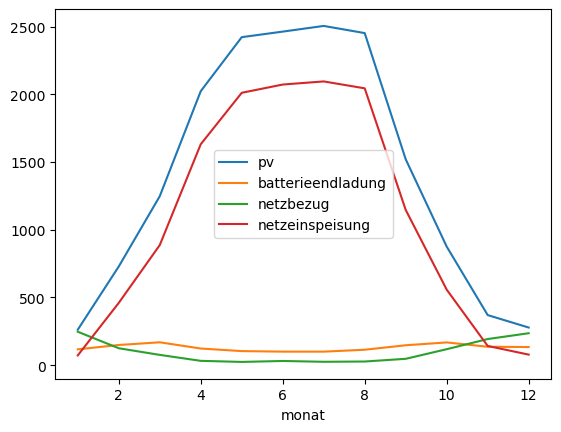

In [6]:
from ipywidgets import widgets
from IPython.display import display


import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(summary)
df.plot('monat', ['pv', 'batterieendladung', 'netzbezug','netzeinspeisung'])